In [2]:
import pandas as pd
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.mode.chained_assignment = None

In [3]:
#df1 - таблица с уникальными идентификаторами пользователей
df1= pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-krasheninnikov/first_project_csv/olist_customers_dataset.csv')
#df2 - таблица заказов
df2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-krasheninnikov/first_project_csv/olist_orders_dataset.csv')
#df3 - товарные позиции, входящие в заказы
df3= pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-krasheninnikov/first_project_csv/olist_order_items_dataset.csv')


In [4]:
#Выводим описательную статистику для наших датафреймов
print('Пропущенные значения в df1')
print(df1.isna().sum())
print('Количество дублирующихся строк в df1')
print(len(df1) - len(df1.drop_duplicates()))
print('Размерность df1')
print(df1.shape)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Пропущенные значения в df2')
print(df2.isna().sum())
print('Количество дублирующихся строк в df2')
print(len(df2) - len(df2.drop_duplicates()))
print('Размерность df2')
print(df2.shape)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Пропущенные значения в df3')
print(df3.isna().sum())
print('Количество дублирующихся строк в df3')
print(len(df3) - len(df3.drop_duplicates()))
print('Размерность df3')
print(df3.shape)

Пропущенные значения в df1
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Количество дублирующихся строк в df1
0
Размерность df1
(99441, 5)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Пропущенные значения в df2
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Количество дублирующихся строк в df2
0
Размерность df2
(99441, 8)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Пропущенные значения в df3
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Количеств

## 1) Сколько у нас пользователей, которые совершили покупку только один раз? 

    Покупкой товара необходимо считать полную процедуру перехождения товара в имущество человека заплатившего за него n-ую сумму денег ( на сколько мне известно на интернет платформе Ozon как раз такой подход и реализуется : пользователь переводит деньги -- человек забирает товар -- по истечении 3-х возвратных дней деньги поступают на лицевой счет магазина). За пользователя будем считать уникальный идентификатор пользователя из таблицы df1


In [5]:
#Отбираем пользователей со статусом заказа: доставлен пользователю и их идентификаторами 
df2.query('order_status == "delivered"')[['customer_id', 'order_status']]

,customer_id,order_status
0,9ef432eb6251297304e76186b10a928d,delivered
1,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,41ce2a54c0b03bf3443c3d931a367089,delivered
3,f88197465ea7920adcdbec7375364d82,delivered
4,8ab97904e6daea8866dbdbc4fb7aad2c,delivered
...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,delivered
99437,1fca14ff2861355f6e5f14306ff977a7,delivered
99438,1aa71eb042121263aafbe80c1b562c9c,delivered
99439,b331b74b18dc79bcdf6532d51e1637c1,delivered


In [6]:
#Оставляем из первого датафрейма показанный и уникальный идентификаторы пользователя
df1[['customer_id', 'customer_unique_id']]

,customer_id,customer_unique_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066
...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e


In [7]:
#Джойним наши датафреймы способом left, что бы получить все уникальные id со статусом доставлен пользователю
delivered_id = df2.query('order_status == "delivered"')[['customer_id', 'order_status']] \
               .merge(df1[['customer_id', 'customer_unique_id']], on='customer_id', how='left')
delivered_id

,customer_id,order_status,customer_unique_id
0,9ef432eb6251297304e76186b10a928d,delivered,7c396fd4830fd04220f754e42b4e5bff
1,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,af07308b275d755c9edb36a90c618231
2,41ce2a54c0b03bf3443c3d931a367089,delivered,3a653a41f6f9fc3d2a113cf8398680e8
3,f88197465ea7920adcdbec7375364d82,delivered,7c142cf63193a1473d2e66489a9ae977
4,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...
96473,39bd1228ee8140590ac3aca26f2dfe00,delivered,6359f309b166b0196dbf7ad2ac62bb5a
96474,1fca14ff2861355f6e5f14306ff977a7,delivered,da62f9e57a76d978d02ab5362c509660
96475,1aa71eb042121263aafbe80c1b562c9c,delivered,737520a9aad80b3fbbdad19b66b37b30
96476,b331b74b18dc79bcdf6532d51e1637c1,delivered,5097a5312c8b157bb7be58ae360ef43c


In [8]:
#Выводим уникальные идентификаторы с количеством покупок = 1 
delivered_id.groupby('customer_unique_id', as_index=False).agg({'customer_id':'count'}) \
    .rename(columns={"customer_id": "count_pay"}) \
    .query('count_pay == 1')

,customer_unique_id,count_pay
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1
93354,fffea47cd6d3cc0a88bd621562a9d061,1
93355,ffff371b4d645b6ecea244b27531430a,1
93356,ffff5962728ec6157033ef9805bacc48,1


## Ответ: 90557 пользователей совершили покупку один раз

## 2) Сколько заказов в месяц в среднем не доставляются по разным причинам(вывести детализацию по причинам)?

    Здесь под недоставленными будем считать товары, которые мы могли бы доставить, но в силу отсутствия на складе либо отмены заказа этого не произошло(order_status = unavailable, canceled)
    

In [9]:
df2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [10]:
#Переводим колонки к временному формату
df2.order_purchase_timestamp = pd.to_datetime(df2.order_purchase_timestamp, format='%Y-%m-%d %H:%M:%S')
df2.order_approved_at = pd.to_datetime(df2.order_approved_at, format='%Y-%m-%d %H:%M:%S')
df2.order_delivered_carrier_date = pd.to_datetime(df2.order_delivered_carrier_date, format='%Y-%m-%d %H:%M:%S')
df2.order_delivered_customer_date = pd.to_datetime(df2.order_delivered_customer_date, format='%Y-%m-%d %H:%M:%S')
df2.order_estimated_delivery_date = pd.to_datetime(df2.order_estimated_delivery_date, format='%Y-%m-%d %H:%M:%S')
df2.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [11]:
#Создаем датафрейм со статусами и временем доставки
order_in_mounth = df2[['order_id', 'customer_id', 'order_status', 'order_delivered_customer_date']]
order_in_mounth

,order_id,customer_id,order_status,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-16 18:17:02
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-25 23:32:54


In [12]:
#Переводим колонку order_estimated_delivery_date к формату Год-месяц
order_in_mounth.order_delivered_customer_date = order_in_mounth.order_delivered_customer_date.dt.to_period('M')

In [13]:
#Создаем датафрейм с количеством доставок по месяцам
count_deliveries_month = order_in_mounth.query('order_status == "delivered"') \
    .groupby('order_delivered_customer_date', as_index=False) \
    .agg({'order_status': 'count'}) \
    .rename(columns={'order_status': 'count_deliveries'})
count_deliveries_month


,order_delivered_customer_date,count_deliveries
0,2016-10,205
1,2016-11,58
2,2016-12,4
3,2017-01,283
4,2017-02,1351
5,2017-03,2382
6,2017-04,1849
7,2017-05,3751
8,2017-06,3223
9,2017-07,3455


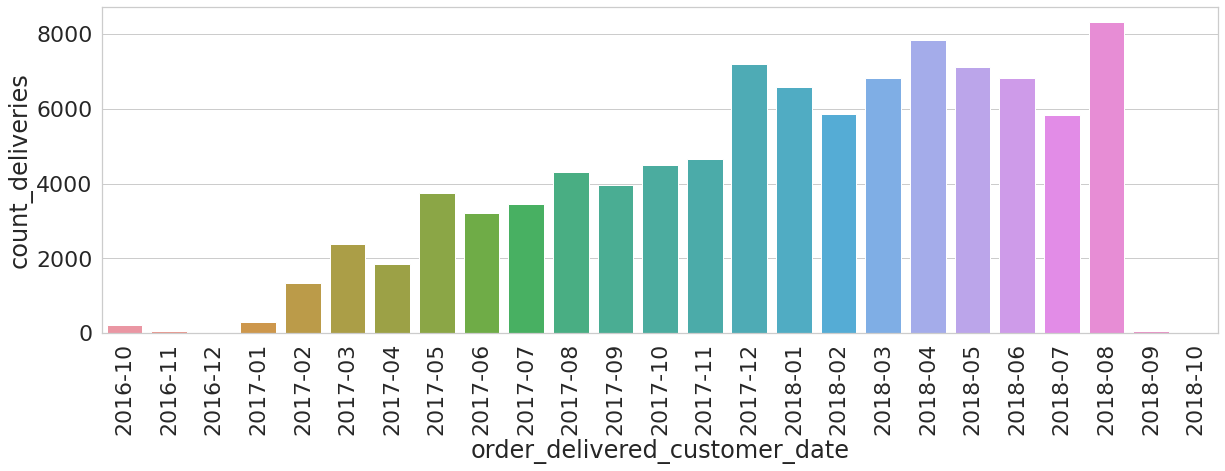

In [13]:
#Строим график количества доставок по месяцам
sns.set(
    font_scale =2,
    style       ='whitegrid',
    rc          ={'figure.figsize':(20,6)}
)
fig, ax= plt.subplots()
sns.barplot(x=count_deliveries_month.order_delivered_customer_date, y=count_deliveries_month.count_deliveries, data=count_deliveries_month)
ax.tick_params(axis='x', rotation= 90)

In [14]:
#Считаю среднее и медианное количество доставок по месяцам
print(count_deliveries_month.count_deliveries.mean().round(0))
print(count_deliveries_month.count_deliveries.median().round(0))

3859.0
3965.0


In [15]:
#Датафрейм с недоставленными товарами
df2.query('order_status == "unavailable" or order_status == "canceled"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [16]:
#Так как по по данным статусам будет много пропущенных значений в колонке с временем доставки
# логичнее недоставленные товары оценивать по времени создания заказа
cancelled_deliveries = df2.query('order_status == "unavailable" or order_status == "canceled"')[['order_status', 'order_purchase_timestamp']]
cancelled_deliveries

,order_status,order_purchase_timestamp
266,unavailable,2017-11-16 15:09:28
397,canceled,2018-08-04 14:29:27
586,unavailable,2018-01-31 11:31:37
613,canceled,2018-01-26 21:34:08
687,unavailable,2017-08-14 17:38:02
...,...,...
99252,unavailable,2018-01-16 14:27:59
99283,canceled,2018-08-31 16:13:44
99347,canceled,2018-09-06 18:45:47
99348,unavailable,2017-08-23 16:28:04


In [17]:
#Переводим колонку order_purchase_timestamp к формату Год-месяц
cancelled_deliveries.order_purchase_timestamp = cancelled_deliveries.order_purchase_timestamp.dt.to_period('M')
cancelled_deliveries

,order_status,order_purchase_timestamp
266,unavailable,2017-11
397,canceled,2018-08
586,unavailable,2018-01
613,canceled,2018-01
687,unavailable,2017-08
...,...,...
99252,unavailable,2018-01
99283,canceled,2018-08
99347,canceled,2018-09
99348,unavailable,2017-08


In [18]:
#Создаем датафрейм с количеством недоставленных товаров по месяцам
count_cancelled_deliveries = cancelled_deliveries.groupby('order_purchase_timestamp', as_index=False) \
               .agg({'order_status': 'count'}) \
               .rename(columns={'order_status': 'count_cancelled_deliveries'})
count_cancelled_deliveries

,order_purchase_timestamp,count_cancelled_deliveries
0,2016-09,2
1,2016-10,31
2,2017-01,13
3,2017-02,62
4,2017-03,65
5,2017-04,27
6,2017-05,60
7,2017-06,40
8,2017-07,80
9,2017-08,59


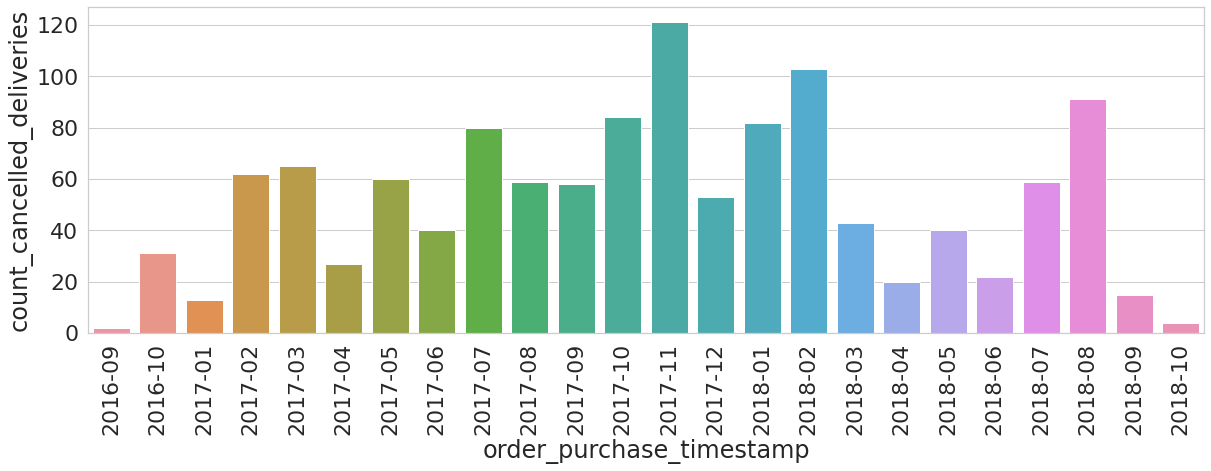

In [19]:
#Строим график недоставленных товаров по месяцам
sns.set(
    font_scale =2,
    style       ='whitegrid',
    rc          ={'figure.figsize':(20,6)}
)
fig, ax= plt.subplots()
sns.barplot(x=count_cancelled_deliveries.order_purchase_timestamp, y=count_cancelled_deliveries.count_cancelled_deliveries, data=count_cancelled_deliveries)
ax.tick_params(axis='x', rotation= 90)

In [20]:
#Считаем среднее и медианное количество не доставленых заказов
print(count_cancelled_deliveries.count_cancelled_deliveries.mean().round(0))
print(count_cancelled_deliveries.count_cancelled_deliveries.median().round(0))

51.0
56.0


## Ответ: в среднем 51 заказ не доставляется в месяц

In [21]:
#Отношение доставленных товаров к недоставленным составляет примерно 1%, что довольно хороший показатель
count_cancelled_deliveries.count_cancelled_deliveries.mean().round(0) / count_deliveries_month.count_deliveries.mean().round(0)

0.013215859030837005

In [22]:
#Детальная статистика недоставленных заказов
reasons_for_canceling = cancelled_deliveries \
    .groupby('order_status', as_index=False) \
    .size()
reasons_for_canceling

,order_status,size
0,canceled,625
1,unavailable,609


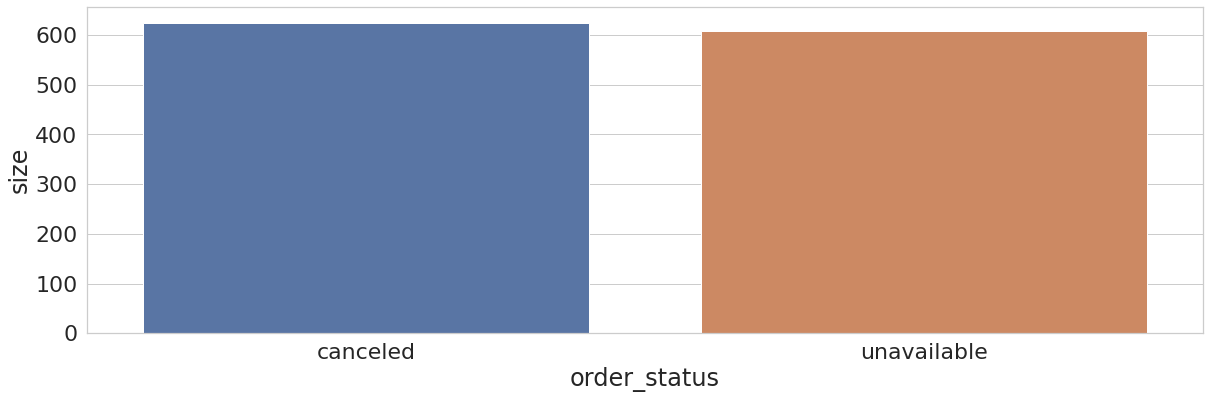

In [23]:
#В целом примерно одинаковое количество недоставленных заказов из-за недоступных и отмененных статусов
sns.barplot(y='size', x='order_status', data=reasons_for_canceling)

## 3) По каждому товару определить, в какой день недели товар чаще всего покупается.
    За товары принимаем product_id из таблицы с товарными позициями df3. За день недели покупки так же считаем order_delivered_customer_date из таблицы заказов df2

In [24]:
#Достаем идентификаторы заказов и ид товаров из df3
prod_id = df3[['order_id', 'product_id']]
prod_id

,order_id,product_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089
...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e


In [25]:
#Достаем датафрейм со статусом доставлен, временем доставки и иднтификаторами заказов из df2
delivered_id_df2 = df2.query('order_status == "delivered"')[['order_id', 'order_status', 'order_delivered_customer_date']]
delivered_id_df2

,order_id,order_status,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-16 18:17:02
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,delivered,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,delivered,2018-01-25 23:32:54


In [26]:
#Мерджим к delivered_id prod_id способом left
freq_by_week = delivered_id_df2.merge(prod_id, on='order_id', how='left')
freq_by_week

,order_id,order_status,order_delivered_customer_date,product_id
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-10 21:25:13,87285b34884572647811a353c7ac498a
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-08-07 15:27:45,595fac2a385ac33a80bd5114aec74eb8
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-17 18:06:29,aa4383b373c6aca5d8797843e5594415
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-12-02 00:28:42,d0b61bfb1de832b15ba9d266ca96e5b0
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-16 18:17:02,65266b2da20d04dbe00c5c2d3bb7859e
...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-28 17:37:56,f1d4ce8c6dd66c47bbaa8c6781c2a923
110193,83c1379a015df1e13d02aae0204711ab,delivered,2017-09-21 11:24:17,b80910977a37536adeddd63663f916ad
110194,11c177c8e97725db2631073c19f07b62,delivered,2018-01-25 23:32:54,d1c427060a0f73f6b889a5c7c61f2ac4
110195,11c177c8e97725db2631073c19f07b62,delivered,2018-01-25 23:32:54,d1c427060a0f73f6b889a5c7c61f2ac4


In [27]:
#Переводим дату в дни недели
freq_by_week.order_delivered_customer_date = freq_by_week.order_delivered_customer_date.dt.day_name()

## Вывожу датафрейм с самым частым днем покупок для каждого товара. Не вижу смысла убирать значения с одинаковыми числами покупок, т.к любой из этих дней и будет являться самым частым

In [28]:
freq_by_week.groupby(['product_id','order_delivered_customer_date'], as_index=False).agg({'order_status': 'count'}) \
    .sort_values('order_status', ascending=False) \
    .groupby('product_id', as_index=False).agg({'order_delivered_customer_date': 'first'})

,product_id,order_delivered_customer_date
0,00066f42aeeb9f3007548bb9d3f33c38,Wednesday
1,00088930e925c41fd95ebfe695fd2655,Saturday
2,0009406fd7479715e4bef61dd91f2462,Saturday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32209,fff6177642830a9a94a0f2cba5e476d1,Tuesday
32210,fff81cc3158d2725c0655ab9ba0f712c,Wednesday
32211,fff9553ac224cec9d15d49f5a263411f,Monday
32212,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday


## 4) Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?
    Для решения данного задания необходимо создать датафрейм с количеством покупок для каждого уникального пользователя по месяцу, узнать сколько в этом месяце было недель. Далее необходимо посчитать метрику (кол.покупок/кол.недель в мес.). Для подсчета среднего значения данной метрики, необходимо отобрать только тех пользователей, у которых присутствуют покупки в разные месяцы, иначе среднее и будет являтся значению нашей метрики. ( ПРИМЕЧАНИЕ: рассматривать будем только те месяцы в которых пользователи совершали покупки иначе наше среднее будет стремиться к нулю)

In [29]:
#Вывожу таблицу из df2 доставленные заказы идентификаторы пользователя и даты доставки
df2.query('order_status == "delivered"')[['customer_id', 'order_delivered_customer_date']]

,customer_id,order_delivered_customer_date
0,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-08-07 15:27:45
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-17 18:06:29
3,f88197465ea7920adcdbec7375364d82,2017-12-02 00:28:42
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-16 18:17:02
...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,2017-03-17 15:08:01
99437,1fca14ff2861355f6e5f14306ff977a7,2018-02-28 17:37:56
99438,1aa71eb042121263aafbe80c1b562c9c,2017-09-21 11:24:17
99439,b331b74b18dc79bcdf6532d51e1637c1,2018-01-25 23:32:54


In [30]:
#Вывожу таблицы df1 идентификаторы пользователей и уникальные идентификаторы
df1[['customer_id', 'customer_unique_id']]

,customer_id,customer_unique_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066
...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e


In [31]:
#Мерджу лефт джоином и убераю все NaN по дате, так как нам нужна будет именно дата для подсчета метрики
df_task4 = df2.query('order_status == "delivered"')[['customer_id', 'order_delivered_customer_date']] \
    .merge(df1[['customer_id', 'customer_unique_id']], on='customer_id', how='left').dropna()
df_task4

,customer_id,order_delivered_customer_date,customer_unique_id
0,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8
3,f88197465ea7920adcdbec7375364d82,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...
96473,39bd1228ee8140590ac3aca26f2dfe00,2017-03-17 15:08:01,6359f309b166b0196dbf7ad2ac62bb5a
96474,1fca14ff2861355f6e5f14306ff977a7,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660
96475,1aa71eb042121263aafbe80c1b562c9c,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30
96476,b331b74b18dc79bcdf6532d51e1637c1,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c


In [32]:
#Превожу дату формату Год-месяц
df_task4.order_delivered_customer_date = df_task4.order_delivered_customer_date.dt.to_period('M')

In [33]:
#Считаю количество покупок в месяц для каждого уникального пользователя
count_buy_in_month = df_task4.groupby(['customer_unique_id', 'order_delivered_customer_date'], as_index=False) \
    .agg({'customer_id':'count'}) \
    .rename(columns={'customer_id': 'count_buy_in_month'}) \
    .sort_values('order_delivered_customer_date', ascending=True)
count_buy_in_month

,customer_unique_id,order_delivered_customer_date,count_buy_in_month
92255,f79fe58e24e35fe4c036e1fb462769de,2016-10,1
30617,522e714643e682c9eff7415cffae54fb,2016-10,1
2296,0636d30c77f0f9cfad81f1c9b58c791f,2016-10,1
30354,517a3d8518447c776efd430b66470e27,2016-10,1
45474,7a176e5d88c7acb6000a055e008c055d,2016-10,2
...,...,...,...
92382,f7f8503e3befafa49f5dd00928dc0dd6,2018-09,1
92859,f942774febec601b810cb1987bcb46da,2018-09,1
93857,fc0bcca3d8d90a812b707bb8e45069d6,2018-10,1
28213,4bc530761c1b59d33d7c6cb640d3ee78,2018-10,1


In [34]:
#Создаю колонку с количеством недель в месяце
count_buy_in_month['number_of_week_in_month'] = count_buy_in_month.order_delivered_customer_date.dt.daysinmonth / 7
#Создаю колонку с метрикой количества покупок в неделю по месяцу
count_buy_in_month['count_buy_in_week_by_month'] = count_buy_in_month.count_buy_in_month / count_buy_in_month.number_of_week_in_month

In [35]:
count_buy_in_month

,customer_unique_id,order_delivered_customer_date,count_buy_in_month,number_of_week_in_month,count_buy_in_week_by_month
92255,f79fe58e24e35fe4c036e1fb462769de,2016-10,1,4.428571,0.225806
30617,522e714643e682c9eff7415cffae54fb,2016-10,1,4.428571,0.225806
2296,0636d30c77f0f9cfad81f1c9b58c791f,2016-10,1,4.428571,0.225806
30354,517a3d8518447c776efd430b66470e27,2016-10,1,4.428571,0.225806
45474,7a176e5d88c7acb6000a055e008c055d,2016-10,2,4.428571,0.451613
...,...,...,...,...,...
92382,f7f8503e3befafa49f5dd00928dc0dd6,2018-09,1,4.285714,0.233333
92859,f942774febec601b810cb1987bcb46da,2018-09,1,4.285714,0.233333
93857,fc0bcca3d8d90a812b707bb8e45069d6,2018-10,1,4.428571,0.225806
28213,4bc530761c1b59d33d7c6cb640d3ee78,2018-10,1,4.428571,0.225806


In [36]:
#Присваиваю серию с уникальными айдишниками,что бы в дальнейшем отобрать все ид у которых есть покупки в разные месяцы
customer_unique_id_task4 = count_buy_in_month['customer_unique_id']

In [37]:
#Отбираю все ид с покупками в разные месяцы и считаю средние значения для них
mean_buy_in_week_by_month = count_buy_in_month[customer_unique_id_task4.isin(customer_unique_id_task4[customer_unique_id_task4.duplicated()])] \
    .sort_values('customer_unique_id') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'count_buy_in_week_by_month' : 'mean'}) \
    .rename(columns={'count_buy_in_week_by_month': 'mean_buy_in_week_by_month'}) \
    .sort_values('mean_buy_in_week_by_month', ascending=False)
mean_buy_in_week_by_month

,customer_unique_id,mean_buy_in_week_by_month
1567,de34b16117594161a6a89c50b289d35a,0.575806
1273,b4e4f24de1e8725b74e4a1f4975116ed,0.568280
1147,a239b8e2fbce33780f1f1912e2ee5275,0.487903
1186,a7657330b1c135f3acd420326e335b2c,0.466667
58,08e5b38d7948d37fbb2a59fc5e175ab1,0.462903
...,...,...
919,862b2c6ccf4352c087cd60cdac498b48,0.225806
920,862bcdd9344546914b93a16397a78791,0.225806
924,86b59358310b208f822e416e59c96672,0.225806
930,87914dda99d76004bfd05778028fa7e8,0.225806


## 5) Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 
     В когорты будем объединять по месяцу совершения покупки, т.к на мой взгляд это самое логичное решения в связи с тем, что у нас не так много пользователей совершавших покупки более 1 раза за общий период времени 24 месяца. (Если бы мы объединяли в когорты по дню совершения покупок, у нас бы было много значений с retantion = 0. И анологичная ситуация была бы если бы мы делили в когорты по купленному товару).  Следующим шагом будет вывод количества пользователей и количества покупок для каждой когорты и далее посмотрим как наши пользователи возвращались в другие месяцы для совершения покупок.


In [29]:
# Воспользуемся датафреймом из 3 задания со всеми покупками
order_payment1 = df2.query('order_status == "delivered"')[['customer_id', 'order_delivered_customer_date']] \
    .merge(df1[['customer_id', 'customer_unique_id']], on='customer_id', how='left').dropna()

In [30]:
order_payment1

,customer_id,order_delivered_customer_date,customer_unique_id
0,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8
3,f88197465ea7920adcdbec7375364d82,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...
96473,39bd1228ee8140590ac3aca26f2dfe00,2017-03-17 15:08:01,6359f309b166b0196dbf7ad2ac62bb5a
96474,1fca14ff2861355f6e5f14306ff977a7,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660
96475,1aa71eb042121263aafbe80c1b562c9c,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30
96476,b331b74b18dc79bcdf6532d51e1637c1,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c


In [31]:
#Дабавим колонку с годом и месяцем для каждой покупки
order_payment1['order_period'] = order_payment1.order_delivered_customer_date.apply(lambda x: x.strftime('%Y-%m'))

In [32]:
order_payment1

,customer_id,order_delivered_customer_date,customer_unique_id,order_period
0,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,2017-10
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,2018-08
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,2018-08
3,f88197465ea7920adcdbec7375364d82,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,2017-12
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,2018-02
...,...,...,...,...
96473,39bd1228ee8140590ac3aca26f2dfe00,2017-03-17 15:08:01,6359f309b166b0196dbf7ad2ac62bb5a,2017-03
96474,1fca14ff2861355f6e5f14306ff977a7,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660,2018-02
96475,1aa71eb042121263aafbe80c1b562c9c,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30,2017-09
96476,b331b74b18dc79bcdf6532d51e1637c1,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c,2018-01


In [33]:
#Создаем датафрейм с первой покупкой
first_order = order_payment1.groupby('customer_unique_id', as_index=False) \
    .agg({'order_delivered_customer_date': 'min'}) \
    .rename(columns={'order_delivered_customer_date': 'first_order'})
first_order.first_order =first_order.first_order.apply(lambda x: x.strftime('%Y-%m'))
first_order

,customer_unique_id,first_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-04
3,0000f6ccb0745a6a4b88665a16c9f078,2017-11
4,0004aac84e0df4da2b147fca70cf8255,2017-11
...,...,...
93345,fffcf5a5ff07b0908bd4e2dbc735a684,2017-07
93346,fffea47cd6d3cc0a88bd621562a9d061,2018-01
93347,ffff371b4d645b6ecea244b27531430a,2017-02
93348,ffff5962728ec6157033ef9805bacc48,2018-05


In [34]:
#Мерджим к основному датафрейму
order_payment1 = order_payment1.merge(first_order, on='customer_unique_id')
order_payment1

,customer_id,order_delivered_customer_date,customer_unique_id,order_period,first_order
0,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09
1,31f31efcb333fcbad2b1371c8cf0fa84,2017-09-05 19:20:20,7c396fd4830fd04220f754e42b4e5bff,2017-09,2017-09
2,b0830fb4747a6c6d20dea0b8c802d7ef,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,2018-08,2018-08
3,41ce2a54c0b03bf3443c3d931a367089,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08
4,f88197465ea7920adcdbec7375364d82,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,2017-12,2017-12
...,...,...,...,...,...
96465,39bd1228ee8140590ac3aca26f2dfe00,2017-03-17 15:08:01,6359f309b166b0196dbf7ad2ac62bb5a,2017-03,2017-03
96466,1fca14ff2861355f6e5f14306ff977a7,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660,2018-02,2018-02
96467,1aa71eb042121263aafbe80c1b562c9c,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30,2017-09,2017-09
96468,b331b74b18dc79bcdf6532d51e1637c1,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c,2018-01,2018-01


In [35]:
#Объединяем в группы и считаем кол-во уникальных клиентов и количество покупок по периодам времени
cohorts = order_payment1.groupby(['first_order', 'order_period']).agg({'customer_unique_id': 'nunique',
                                                             'customer_id': 'count'}) \
               .rename(columns={'customer_unique_id': 'TotalUsers',
                                'customer_id': 'TotalOrders'})

In [36]:
cohorts

TotalUsers  TotalOrders
first_order order_period                         
2016-10     2016-10              203          205
            2016-11                1            1
            2017-04                1            1
            2017-08                1            1
            2017-10                1            1
...                              ...          ...
2018-07     2018-08               36           37
2018-08     2018-08             8046         8105
            2018-09                1            1
2018-09     2018-09               54           54
2018-10     2018-10                3            3

[219 rows x 2 columns]

In [37]:
#Для удобства обозначения когорт  определим CohortPeriod, как порядковый номер месяца в массиве, 
#когда пользователи возвращались для совершения покупкуи
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1 # отсчет с 1
    return df
cohorts = cohorts.groupby('first_order').apply(cohort_period)

In [38]:
#Через сводную таблицу выводим значения с пользователями для каждого когортного периода
retantion_count = cohorts.reset_index() \
       .pivot(columns='CohortPeriod', index='first_order', values='TotalUsers')
retantion_count

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
first_order,,,,,,,,,,,,,,,,,,
2016-10,203.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,263.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
2017-02,1325.0,9.0,3.0,4.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,3.0,1.0
2017-03,2344.0,13.0,7.0,10.0,7.0,2.0,7.0,6.0,7.0,5.0,6.0,1.0,1.0,7.0,3.0,4.0,3.0,2.0
2017-04,1804.0,14.0,5.0,4.0,5.0,3.0,5.0,1.0,7.0,4.0,5.0,2.0,2.0,2.0,3.0,3.0,NaN,NaN
2017-05,3673.0,27.0,12.0,6.0,13.0,14.0,9.0,13.0,8.0,8.0,9.0,11.0,5.0,6.0,7.0,8.0,NaN,NaN
2017-06,3124.0,22.0,18.0,14.0,11.0,8.0,12.0,6.0,6.0,7.0,5.0,6.0,7.0,7.0,8.0,NaN,NaN,NaN


In [39]:
#Показываем доли возврата от первоначального значения для когорт это и есть retantion
retantion_count.div(retantion_count[1], axis=0)

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
first_order,,,,,,,,,,,,,,,,,,
2016-10,1.0,0.004926,0.004926,0.004926,0.004926,0.004926,0.004926,0.004926,0.009852,0.004926,0.004926,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.011407,0.003802,0.003802,0.003802,0.003802,0.003802,0.003802,0.007605,0.011407,0.003802,0.007605,0.003802,NaN,NaN,NaN,NaN,NaN
2017-02,1.0,0.006792,0.002264,0.003019,0.003019,0.001509,0.001509,0.002264,0.000755,0.000755,0.001509,0.003774,0.002264,0.001509,0.000755,0.001509,0.002264,0.000755
2017-03,1.0,0.005546,0.002986,0.004266,0.002986,0.000853,0.002986,0.002560,0.002986,0.002133,0.002560,0.000427,0.000427,0.002986,0.001280,0.001706,0.001280,0.000853
2017-04,1.0,0.007761,0.002772,0.002217,0.002772,0.001663,0.002772,0.000554,0.003880,0.002217,0.002772,0.001109,0.001109,0.001109,0.001663,0.001663,NaN,NaN
2017-05,1.0,0.007351,0.003267,0.001634,0.003539,0.003812,0.002450,0.003539,0.002178,0.002178,0.002450,0.002995,0.001361,0.001634,0.001906,0.002178,NaN,NaN
2017-06,1.0,0.007042,0.005762,0.004481,0.003521,0.002561,0.003841,0.001921,0.001921,0.002241,0.001601,0.001921,0.002241,0.002241,0.002561,NaN,NaN,NaN


## В задании нас просят найти когорту с самым высоким retantion на 3 месяц в период времени с января по декабрь. В данных присутствует только 2017 год с такими временными промежутками. Из таблицы retantion уже можно было сделать вывод, но для наглядности мы визуализируем наш retantion для 2017 года.

Text(0, 0.5, '% of Cohort Purchasing')

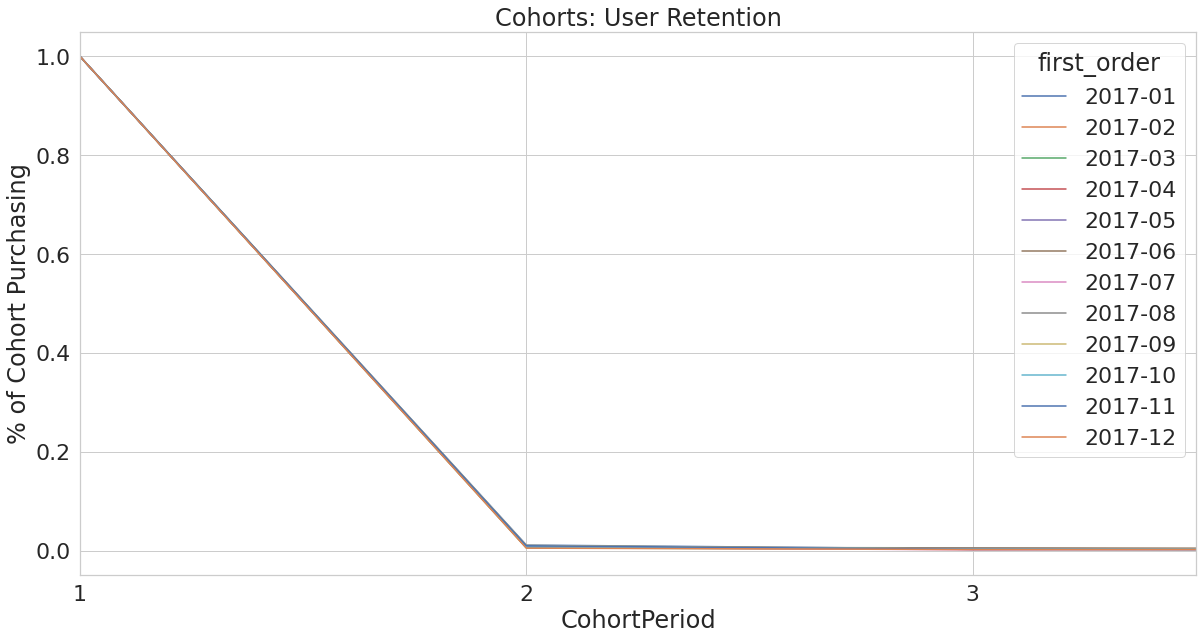

In [40]:
#Графическое представление когорт за 2017 год
retantion_count.div(retantion_count[1], axis=0).T[['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12']] \
              .plot(figsize=(20,10))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1)) # разбивка оси X
plt.xlim(1, 3.5) #ось X
plt.ylabel('% of Cohort Purchasing')

## Как я уже и упомянал что у нас слишком мало пользователей, которые совершали более 1 покупки. Значения retantion по каждому месяцу и должно быть малым числом. Предыдущий график дает нам мало наглядности, поэтому построим табличку Retantion наподобие что используется в Google Analytics со значениями и сделаем вывод по ней.

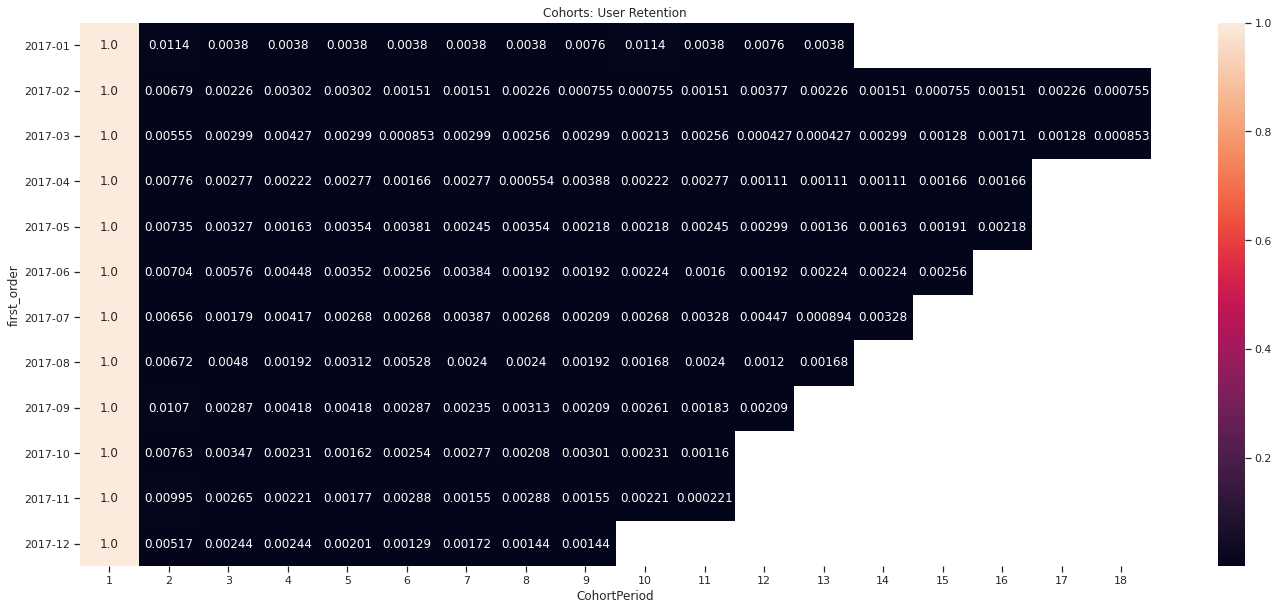

In [41]:
sns.set(style='ticks')
plt.figure(figsize=(24, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(retantion_count.div(retantion_count[1], axis=0).T[['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12']].T, annot=True, fmt='.3')

## Ответ: для 3 когортного периода самое высокое значение Retantion у когорты совершивших первую покупку в июне 2017 года. RR= 0,00576

## 6) Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

In [42]:
# Создаем датафрейм со всеми покупками и ценами на них
order_rfm1 = df2.query('order_status == "delivered"')[['customer_id', 'order_delivered_customer_date', 'order_id']] \
    .merge(df3.groupby('order_id', as_index=False).agg({'price':'sum'}), on='order_id', how='left') \
    .merge(df1[['customer_id', 'customer_unique_id']], on='customer_id', how='left').dropna() \
    [['customer_id', 'customer_unique_id', 'order_delivered_customer_date', 'price']]
order_rfm1

,customer_id,customer_unique_id,order_delivered_customer_date,price
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-10 21:25:13,29.99
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-08-07 15:27:45,118.70
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-17 18:06:29,159.90
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,2017-12-02 00:28:42,45.00
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-16 18:17:02,19.90
...,...,...,...,...
96473,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-17 15:08:01,72.00
96474,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,2018-02-28 17:37:56,174.90
96475,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,2017-09-21 11:24:17,205.99
96476,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,2018-01-25 23:32:54,359.98


In [43]:
#Дабавим колонку с днем покупки и переименуем колонку
order_rfm1.order_delivered_customer_date = order_rfm1.order_delivered_customer_date.apply(lambda x: x.strftime('%Y-%m-%d'))
order_rfm1.order_delivered_customer_date = pd.to_datetime(order_rfm1.order_delivered_customer_date, format='%Y-%m-%d')
order_rfm1 = order_rfm1.rename(columns={'order_delivered_customer_date': 'order_day'})

In [44]:
#Смотрим дату последней покупки, для расчета давности будем использовать это значение в качестве даты для функции NOW
NOW = order_rfm1.order_day.max()
NOW

Timestamp('2018-10-17 00:00:00')

In [45]:
#Создаем датафрейм с количеством прошедших дней от последней покупи в нашем датафрейме
#с количеством покупок для каждого пользователя и с потраченной суммой на наши покупки
RFM_table= order_rfm1.groupby('customer_unique_id').agg({'order_day': lambda x: (NOW - x.max()).days, # Recency
                                                'customer_id': lambda x: len(x.unique()), # Frequency
                                                'price': lambda x: x.sum()})    # Monetary 

In [46]:
#Переименовываем колонки для удобства
RFM_table['order_day'] = RFM_table['order_day'].astype(int)
RFM_table.rename(columns={'order_day': 'recency', 
                         'customer_id': 'frequency',
                         'price': 'monetary_value'}, inplace=True)

In [47]:
#Обнулим индексы
RFM_table = RFM_table.reset_index()
RFM_table


,customer_unique_id,recency,frequency,monetary_value
0,0000366f3b9a7992bf8c76cfdf3221e2,154,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,160,1,18.90
2,0000f46a3911fa3c0805444483337064,560,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,324,1,180.00
...,...,...,...,...
93345,fffcf5a5ff07b0908bd4e2dbc735a684,468,1,1570.00
93346,fffea47cd6d3cc0a88bd621562a9d061,281,1,64.89
93347,ffff371b4d645b6ecea244b27531430a,602,1,89.90
93348,ffff5962728ec6157033ef9805bacc48,156,1,115.00


    Для разбития на кластеры воспользуемся квантилями и разобьем наши показатели на 4 равные части, т.к они хорошо покажут количественную оценку поведения клиентов. НО! Квантили не подойдут для разбития клиентов по количеству совершения покупок т.к более 90 процентов нашей аудитории составляют пользователи с 1 покупкой. Поэтому есть 2 варианта решения. 1 Вариант:   вручную оценить пользователей и и разбить их на 4 составные части ( 1- одна покупка, 2- две покупка, 3-три покупки, 4- более 3 покупок). 2 Вариант решения: оценить частоту встречаемости значения покупок в нашем датафрейме, прологарифмировать эти значения для сужения диапазона, заджойнить логарифмические значения к датафрейму и для них проводить f-анализ. Воспользуемся 2 вариантом

In [48]:
#Разбиваем на квантили по времени совершения заказа и количеству потраченных денег на покупки
quantiles = RFM_table[['recency', 'monetary_value']].quantile(q=[0.25,0.5,0.75])
quantiles

,recency,monetary_value
0.25,153.0,47.6500
0.50,253.0,89.7000
0.75,384.0,154.6975


In [49]:
log_frequency= np.log(RFM_table.frequency.value_counts()).reset_index().rename(columns={'index': 'frequency',
                                                                'frequency': 'log_frequency'})
log_frequency

,frequency,log_frequency
0,1,11.413646
1,2,7.852828
2,3,5.198497
3,4,3.332205
4,5,2.197225
5,6,1.609438
6,7,1.098612
7,15,0.000000
8,9,0.000000


In [50]:
#Возьмем квантили для логорифмированного показателя встречаемости
log_frequency.log_frequency.quantile(q=[0.25,0.5,0.75])

0.25    1.098612
0.50    2.197225
0.75    5.198497
Name: log_frequency, dtype: float64

In [51]:
#Заджойним датафреймы с квантилями и перезапишем его
quantiles = quantiles.join(log_frequency.log_frequency.quantile(q=[0.25,0.5,0.75]))

In [52]:
quantiles

,recency,monetary_value,log_frequency
0.25,153.0,47.6500,1.098612
0.50,253.0,89.7000,2.197225
0.75,384.0,154.6975,5.198497


In [53]:
# Заджойним логарифмический показатель встречаемости в основной датафрейм и перезапишем его
RFM_table = RFM_table.merge(log_frequency, on='frequency')

In [54]:
RFM_table

,customer_unique_id,recency,frequency,monetary_value,log_frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,154,1,129.90,11.413646
1,0000b849f77a49e4a4ce2b2a4ca5be3f,160,1,18.90,11.413646
2,0000f46a3911fa3c0805444483337064,560,1,69.00,11.413646
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,25.99,11.413646
4,0004aac84e0df4da2b147fca70cf8255,324,1,180.00,11.413646
...,...,...,...,...,...
93345,b4e4f24de1e8725b74e4a1f4975116ed,187,5,200.28,2.197225
93346,de34b16117594161a6a89c50b289d35a,260,5,486.00,2.197225
93347,fe81bb32c243a86b2f86fbf053fe6140,114,5,1535.40,2.197225
93348,3e43e6105506432c953e165fb2acf44c,216,9,1000.85,0.000000


In [55]:
#Конвертируем quantiles в словарь для более простого использования
quantiles = quantiles.to_dict()

In [56]:
#Создаем датафрейм с RFM сегментацией
RFM_Segment = RFM_table.copy()

In [57]:
#Функция для кластеризации квантилей: для меньших квантилей меньший кластер
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [58]:
#Функция для кластеризации квантилей: для меньших квантилей больший кластер
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [59]:
#Создаем колонки с нашими кластерами и дабавляем в датафрейм с RFM сегментацией
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['log_frequency'].apply(R_Class, args=('log_frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [60]:
RFM_Segment

,customer_unique_id,recency,frequency,monetary_value,log_frequency,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,0000366f3b9a7992bf8c76cfdf3221e2,154,1,129.90,11.413646,3,1,3,313
1,0000b849f77a49e4a4ce2b2a4ca5be3f,160,1,18.90,11.413646,3,1,1,311
2,0000f46a3911fa3c0805444483337064,560,1,69.00,11.413646,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,25.99,11.413646,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,324,1,180.00,11.413646,2,1,4,214
...,...,...,...,...,...,...,...,...,...
93345,b4e4f24de1e8725b74e4a1f4975116ed,187,5,200.28,2.197225,3,3,4,334
93346,de34b16117594161a6a89c50b289d35a,260,5,486.00,2.197225,2,3,4,234
93347,fe81bb32c243a86b2f86fbf053fe6140,114,5,1535.40,2.197225,4,3,4,434
93348,3e43e6105506432c953e165fb2acf44c,216,9,1000.85,0.000000,3,4,4,344


## В данном задании мы построили RFM сегментацию благодаря которой мы можем ответить на разные вопросы  для бизнеса. Для примера 444 - лучшие клиенты. R_Quartile < 2 - находятся на пороге оттока. R_Quartile = 1 - потерянные клиенты. F_Quartile >= 3 - лояльные клиенты